**NAMA : DELILA SEPTIANI DWI PUTRI**

**NIM  : 1306620028**

**KELAS : FISIKA A 2020**

--- 
### **TUGAS PENGOLAHAN CITRA DIGITAL**

Melakukan transformasi rotasi, affine, perspektif, dan pencerminan. 

Membuat plot gambar masing-masing nilai RGB secara terpisah serta histogram RGB gambar. 

## **A. Import Library**


In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## **B. Input Citra**

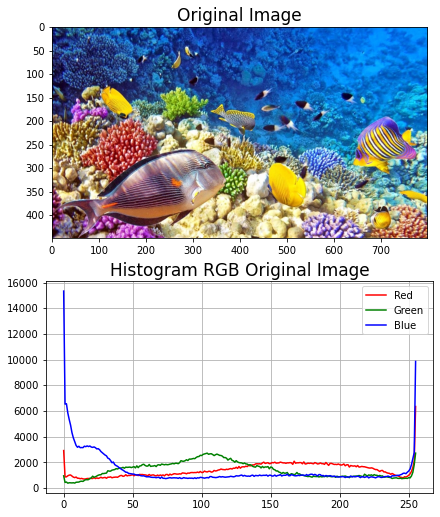

In [40]:
pic = cv2.imread('ican.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
Hist = [cv2.calcHist([pic], [i], None, [256], [0, 256]) for i in range(3)]
R, G, B = Hist[2], Hist[1], Hist[0]

fig = plt.figure(figsize=(6, 10), constrained_layout=True)
spec = fig.add_gridspec(nrows = 3)

ax0 = fig.add_subplot(spec[0])
ax0.imshow(pic)
ax0.set_title('Original Image', fontsize=17)

ax1 = fig.add_subplot(spec[1])
ax1.plot(R, 'red', label='Red')
ax1.plot(G, 'green', label='Green')
ax1.plot(B, 'blue', label = 'Blue')
ax1.set_title('Histogram RGB Original Image', fontsize=17)
ax1.legend()
ax1.grid()


## **C. Transformasi Citra**

### **1. Transformasi Rotasi**

Transformasi rotasi adalah transformasi yang digunakan untuk merotasikan/memutar citra asal sejauh $\theta$ pada setiap piksel citra. 

Matriks untuk pemutaran berupa:


\begin{equation*}
M = 
\begin{bmatrix}
\alpha & \beta & (1-\alpha).x_{pusat}-\beta.y_{pusat} \\
-\beta & \alpha & \beta.x_{pusat}+(1-\alpha).y_{pusat} 
\end{bmatrix}
\end{equation*}

Dimana
$\alpha = skala.cos\theta$

$\beta = skala.sin\theta$

Matriks M diperoleh dengan fungsi pada library open-cv yaitu **cv2.getRotationMatrix2D(pusat, sudut, skala)**

450 800


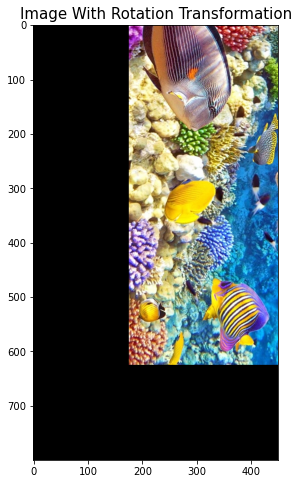

In [41]:
nrow, ncol = pic.shape[:2]
M_rot = cv2.getRotationMatrix2D((ncol/2,nrow/2), -90, 1)
result = cv2.warpAffine(pic, M_rot, (nrow, ncol))
plt.figure(figsize=(10, 8))
plt.imshow(result)
plt.title("Image With Rotation Transformation", fontsize= 15)
print(nrow, ncol)

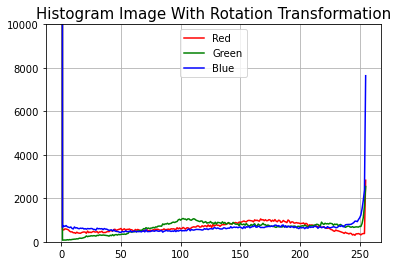

In [42]:
Hist_rot = [cv2.calcHist([result], [i], None, [256], [0, 256]) for i in range(3)]
plt.plot(Hist_rot[2], 'r', label='Red')
plt.plot(Hist_rot[1], 'g', label='Green')
plt.plot(Hist_rot[0], 'b', label = 'Blue')
plt.legend()
plt.grid()
plt.ylim([0, 10000])
plt.title("Histogram Image With Rotation Transformation", fontsize= 15)
plt.show()

### **2. Transformasi Affine**

Transformasi affine adalah transformasi yang digunakan untuk mentransformasikan nilai-nilai koordinat dari suatu sistem koordinat dua dimensi ke sistem koordinat dua dimensi lainya. Sehingga transformasi ini dapat mengubah bentuk citra yang merupakan persegi panjang menjadi suatu bentuk jajar genjang. 

Matriks untuk transformasi affine dapat diperoleh dari library open-cv yaitu

**cv2.getAffineTransfrom(titikAsal, titikTujuan).**

Dengan titik asal dan tujuan berupa titik segitiga.

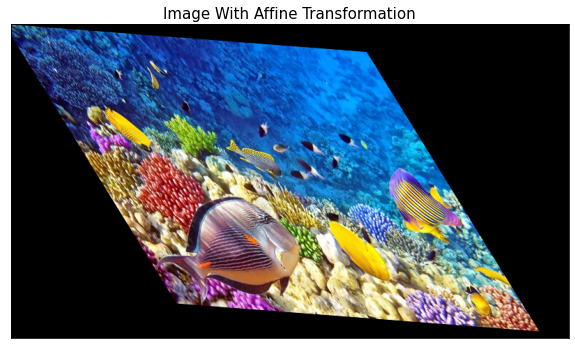

In [43]:
pts1 = np.float32([[0,0], [10,50], [50,50]])
pts2 = np.float32([[-10,0], [24,45], [50, 47]])
M_affine = cv2.getAffineTransform(pts1, pts2)

Hasil = cv2.warpAffine(pic, M_affine, (ncol, nrow))
plt.figure(figsize = (10, 15))
plt.imshow(Hasil)
plt.xticks([])
plt.yticks([])
plt.title("Image With Affine Transformation", fontsize= 15)
plt.show()

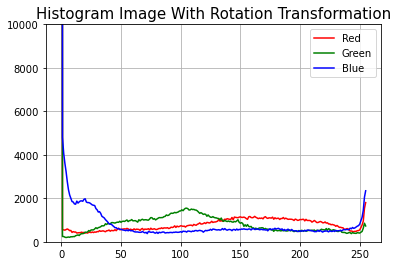

In [44]:
Hist_aff = [cv2.calcHist([Hasil], [i], None, [256], [0, 256]) for i in range(3)]
plt.plot(Hist_aff[2], 'red', label='Red')
plt.plot(Hist_aff[1], 'green', label='Green')
plt.plot(Hist_aff[0], 'blue', label = 'Blue')
plt.legend(), plt.grid()
plt.ylim([0, 10000])
plt.title("Histogram Image With Rotation Transformation", fontsize= 15)
plt.show()

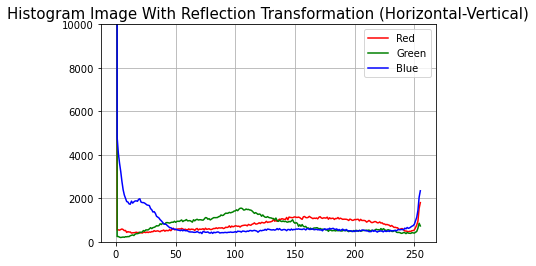

In [45]:
Hist_pencerminan = [cv2.calcHist([Hasil], [i], None, [256], [0, 256]) for i in range(3)]
plt.plot(Hist_pencerminan[2], 'red', label='Red')
plt.plot(Hist_pencerminan[1], 'green', label='Green')
plt.plot(Hist_pencerminan[0], 'blue', label = 'Blue')
plt.legend()
plt.grid()
plt.ylim([0, 10000])
plt.title("Histogram Image With Reflection Transformation (Horizontal-Vertical)", fontsize= 15)
plt.show()

### **3. Transformasi Perspektif**

Transformasi persepektif sama seperti transformasi affine yaitu transformasi yang digunakan untuk mentransformasikan nilai-nilai koordinat dari suatu sistem koordinat dua dimensi ke sistem koordinat dua dimensi lainya. Namun, bentuk yang dihasilkan akan lebih bervariasi (tidak hanya jajar genjang saja) yaitu dapat membentuk bangun yang sembarang/tak beraturan. 

Matriks untuk transformasi perspektif dapat diperoleh dari library open-cv yaitu

**cv2.getPerspectiveTransfrom(titikAsal, titikTujuan).**

Berbeda dengan transformasi affine, transformasi perspektif ini memiliki titik asal dan tujuan berrupa titik segiempat.

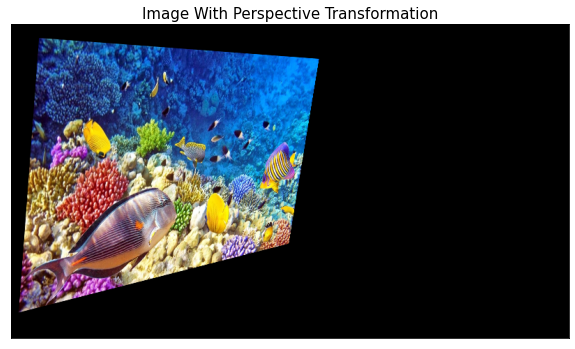

In [46]:
pts1 = np.float32([[0,0], [200,0], [0,300], [200,300]])
pts2 = np.float32([[40,20], [175,30], [20,290],[150, 270]])
M_perspektif = cv2.getPerspectiveTransform(pts1, pts2)

Hasil = cv2.warpPerspective(pic, M_perspektif, (ncol, nrow))
plt.figure(figsize = (10, 15))
plt.imshow(Hasil)
plt.xticks([])
plt.yticks([])
plt.title("Image With Perspective Transformation", fontsize= 15)
plt.show()

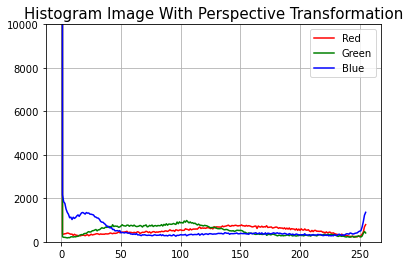

In [47]:
Hist_perspektif = [cv2.calcHist([Hasil], [i], None, [256], [0, 256]) for i in range(3)]
plt.plot(Hist_perspektif[2], 'red', label='Red')
plt.plot(Hist_perspektif[1], 'green', label='Green')
plt.plot(Hist_perspektif[0], 'blue', label = 'Blue')
plt.legend()
plt.grid()
plt.ylim([0, 10000])
plt.title("Histogram Image With Perspective Transformation", fontsize= 15)
plt.show()

### **4. Transformasi Pencerminan**

Transormasi pencerminan merupakan suatu transformasi yang memindahkan titik bidang lewat sifat bayangan suatu cermin. Perubahanya akan ditentukan dengan jarak dari titik, asal ke cermin yang sama dengan jarak cermin ke titik bayangan. Pencerminan bersifat isometris artinya berukuran tetap atau sama.

Metode pencerminan dapat dilakukan dalam 3 mode arah yaitu arah horizontal, vertikal, ataupun gabungan antara horizontal dan verikal.

**Matriks Arah Horizontal**

\begin{equation*}
M = 
\begin{bmatrix}
-1 & 0 & t_{x} \\
0 & 1 & 0
\end{bmatrix}
\end{equation*}

**Matriks Arah  Vertikal**

\begin{equation*}
M = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & -1 & t_{y}
\end{bmatrix}
\end{equation*}

**Matriks Arah  Horizontal dan Vertikal**

\begin{equation*}
M = 
\begin{bmatrix}
-1 & 0 & t_{x} \\
0 & -1 & t_{y}
\end{bmatrix}
\end{equation*}

dengan $t_{x}$ dan $t_{y}$ adalah lebar citra dan tinggi citra.

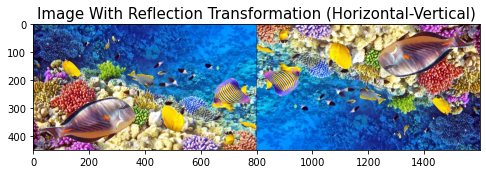

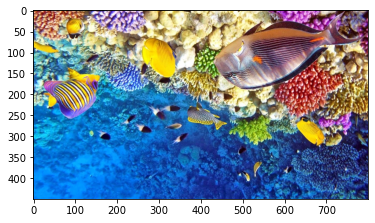

In [48]:
M_cermin = np.float32([[-1, 0, ncol], [0, -1, nrow]])
Hasil = cv2.warpAffine(pic, M_cermin, (ncol, nrow))
Both = np.hstack((pic, Hasil))
plt.figure(figsize = (8, 10))
plt.title("Image With Reflection Transformation (Horizontal-Vertical)", fontsize= 15)
plt.imshow(Both)
plt.show()
plt.imshow(Hasil)
plt.show()